> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
%config Completer.use_jedi = False

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
train_data= pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
test_data= pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake01/test.csv')
print(train_data.head())
print(test_data.head())

   ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   0  58238    971.303       397.202654       186.945510      2.124697   
1   1  44515    757.601       265.590470       213.967453      1.241266   
2   2  31662    653.783       239.902428       168.421505      1.424417   
3   3  38778    734.020       268.446281       184.061923      1.458456   
4   4  42530    775.403       281.212824       193.236878      1.455275   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1      0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2      0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3      0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4      0.726511       43028     232.703412  0.729816  0.988426   0.888895   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.6855

In [4]:
train_data['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

In [5]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

**No null values, no wrong datatypes**

In [6]:
train_data.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 distribution?

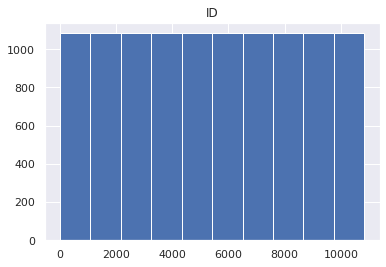

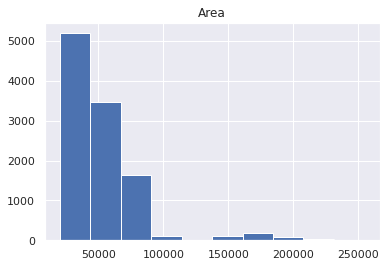

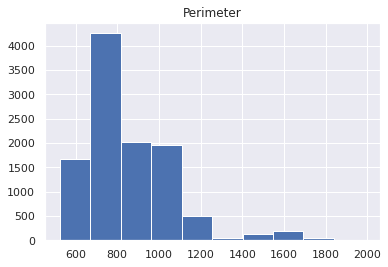

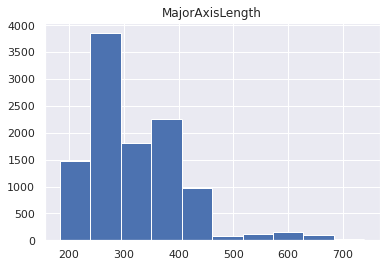

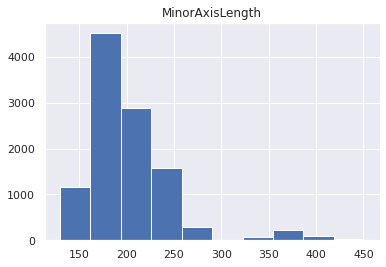

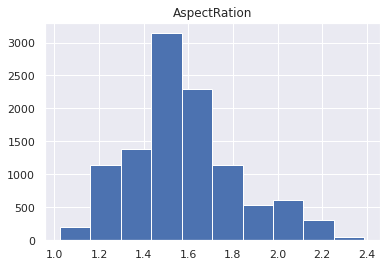

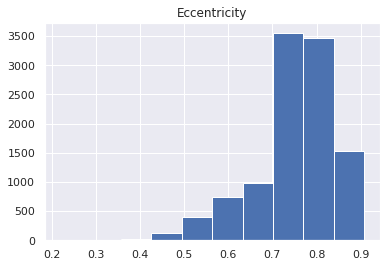

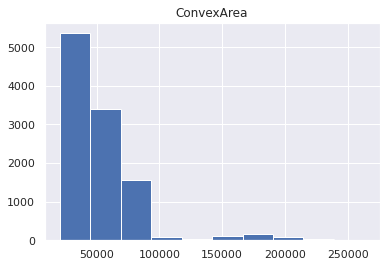

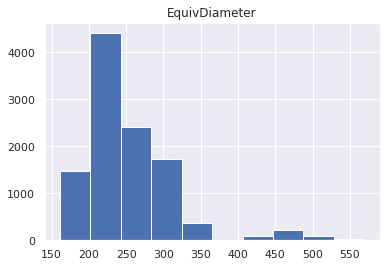

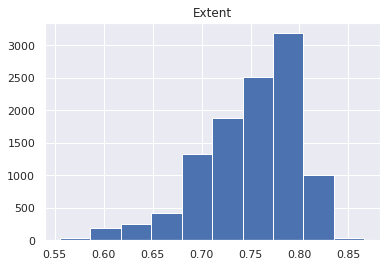

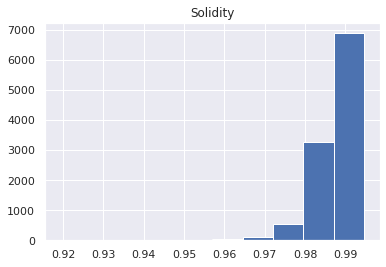

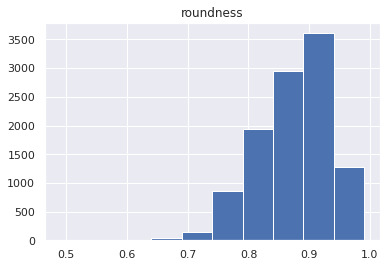

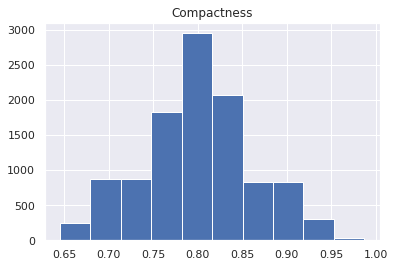

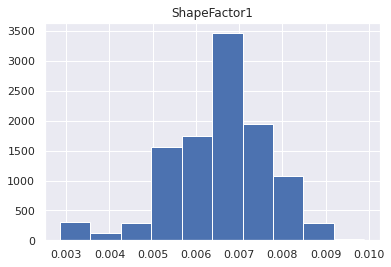

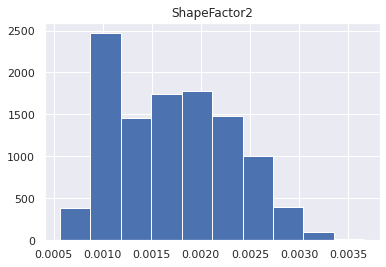

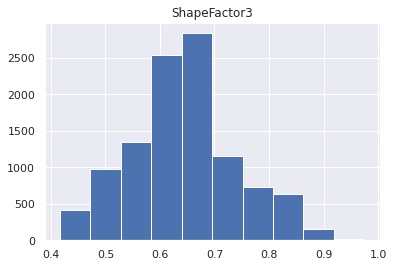

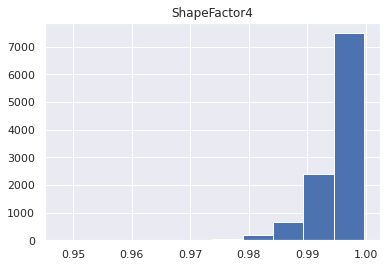

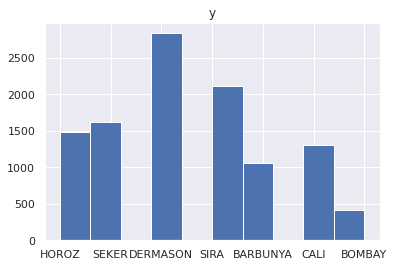

In [8]:
for col in train_data.columns:
    plt.hist(train_data[col])
    plt.title(col)
    plt.show()

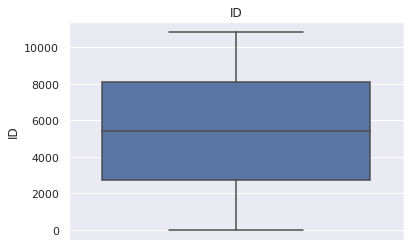

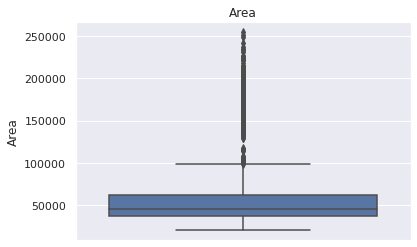

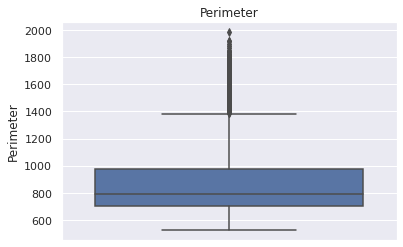

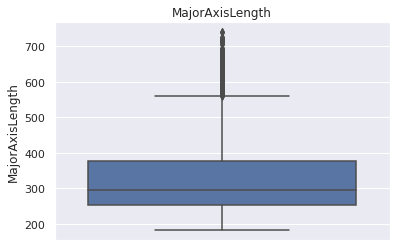

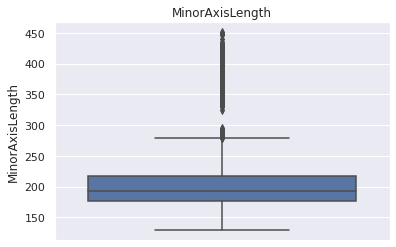

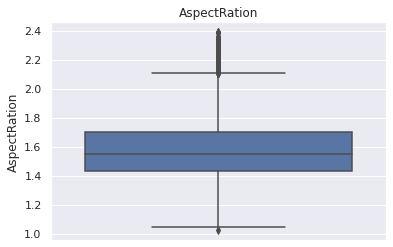

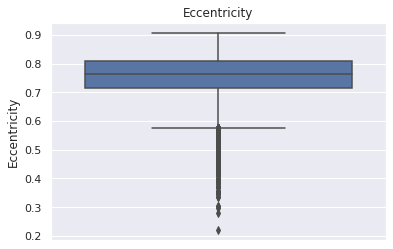

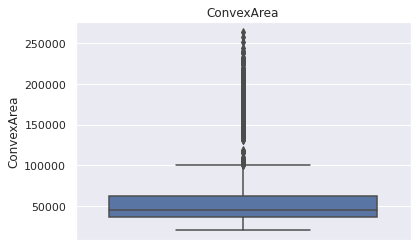

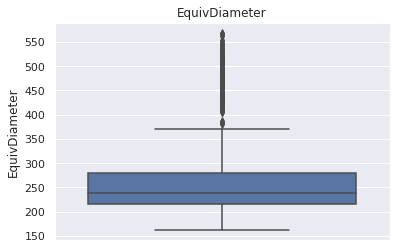

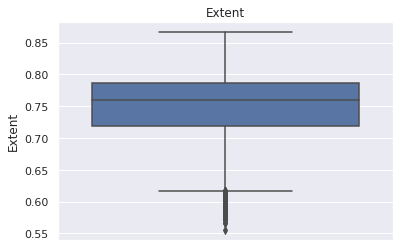

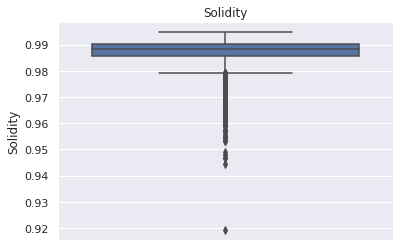

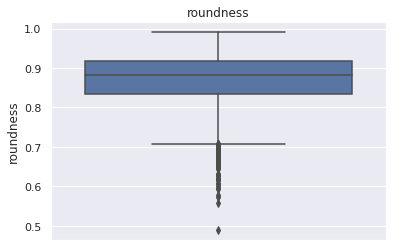

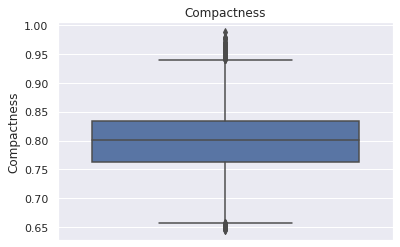

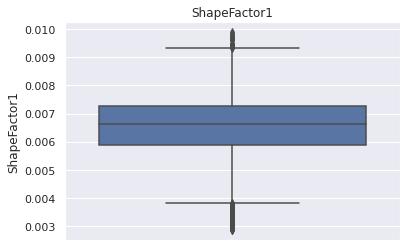

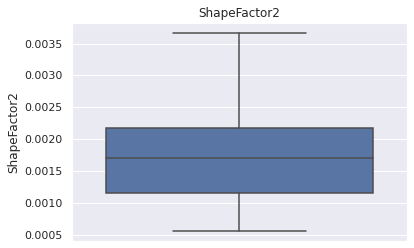

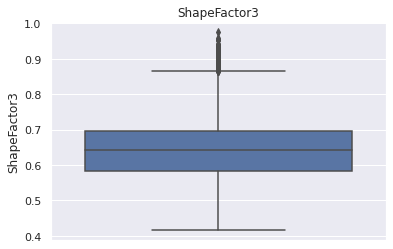

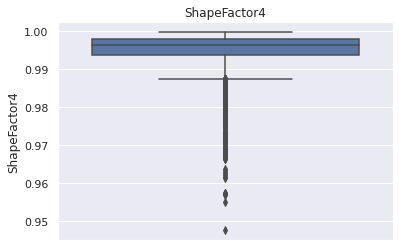

In [9]:
for col in train_data.columns[:-1]:
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.show()

In [10]:
train_df= train_data.drop(columns='ID')
test_df= test_data

In [11]:
train_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

<AxesSubplot:>

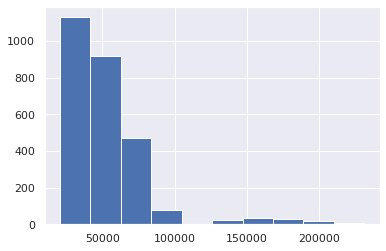

In [12]:
test_df.Area.hist()

<AxesSubplot:>

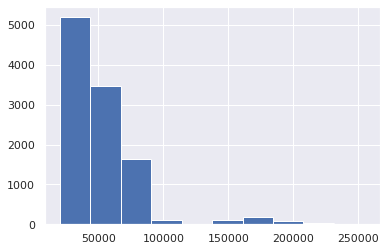

In [13]:
train_df.Area.hist()

<AxesSubplot:>

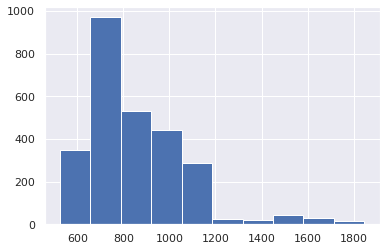

In [14]:
test_df['Perimeter'].hist()

<AxesSubplot:>

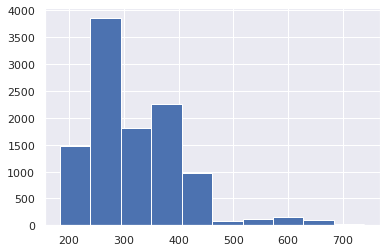

In [15]:
train_df['MajorAxisLength'].hist()

<AxesSubplot:>

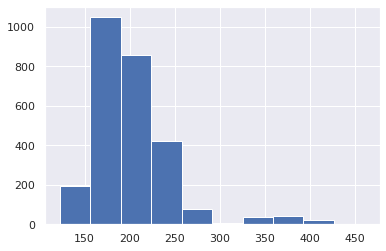

In [16]:
test_df['MinorAxisLength'].hist()

<AxesSubplot:>

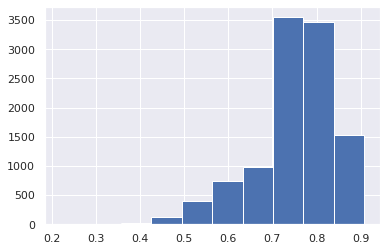

In [17]:
train_df['Eccentricity'].hist()

<AxesSubplot:>

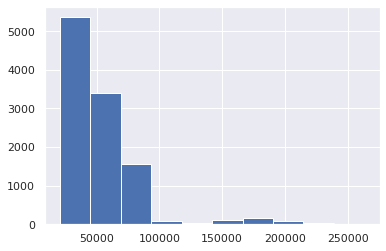

In [18]:
train_df['ConvexArea'].hist()

<AxesSubplot:>

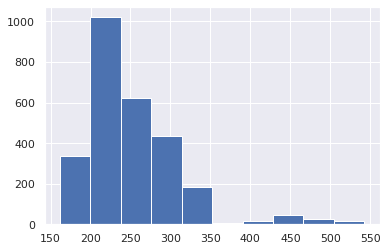

In [19]:
test_df['EquivDiameter'].hist()

<AxesSubplot:>

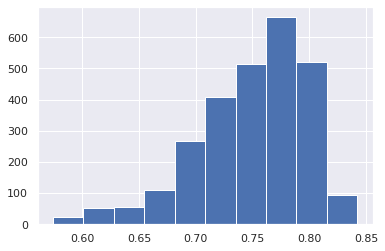

In [20]:
test_df['Extent'].hist()

<AxesSubplot:>

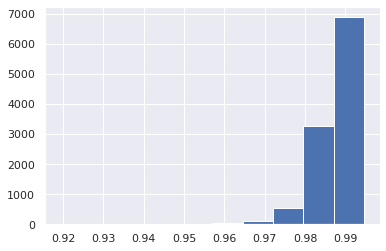

In [21]:
train_df['Solidity'].hist()

<AxesSubplot:>

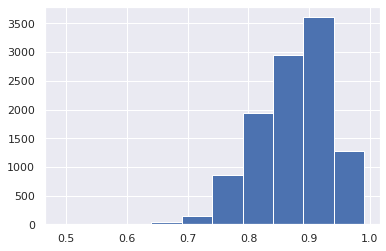

In [22]:
train_df['roundness'].hist()

<AxesSubplot:>

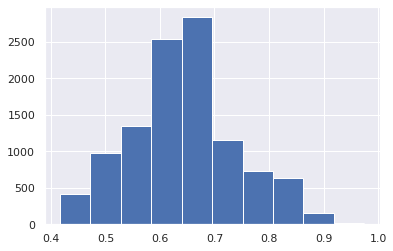

In [23]:
train_df['ShapeFactor3'].hist()

<AxesSubplot:>

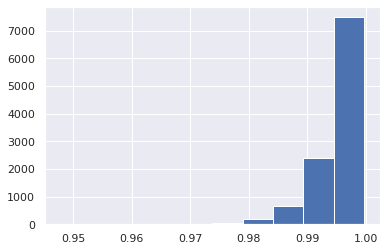

In [24]:
train_df['ShapeFactor4'].hist()

**Splitting data**

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [26]:
train_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [27]:
X= train_df.drop(columns='y')
y= train_df.y

In [28]:
X.min()

Area               20420.000000
Perimeter            524.932000
MajorAxisLength      183.601165
MinorAxisLength      129.576207
AspectRation           1.024868
Eccentricity           0.218951
ConvexArea         20684.000000
EquivDiameter        161.243764
Extent                 0.555315
Solidity               0.919246
roundness              0.489618
Compactness            0.645368
ShapeFactor1           0.002856
ShapeFactor2           0.000564
ShapeFactor3           0.416499
ShapeFactor4           0.947687
dtype: float64

In [29]:
#----------------------------------------------------
#Standard Scaler for Data
from sklearn.preprocessing import QuantileTransformer
# scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
# X = scaler.fit_transform(X)
Quantile = QuantileTransformer(output_distribution='normal')
X = Quantile.fit_transform(X)
test_X=Quantile.fit_transform(test_df.drop(columns='ID'))

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_valid.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_valid.shape)

X_train shape is  (8667, 16)
X_test shape is  (2167, 16)
y_train shape is  (8667,)
y_test shape is  (2167,)


In [30]:
X.min()

-5.199337582605575

**Model training**

In [31]:
#importing libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
# #Applying VotingClassifier Model 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(criterion='entropy', n_estimators=300, max_depth=15, random_state=33)
clf2 = SVC(C=1,kernel="rbf",gamma=.2)
clf3 = GradientBoostingClassifier(n_estimators=200)
#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[('RFModel',clf1),('SVCModel',clf2),('Gradient Boosting',clf3)], voting='hard')
VotingClassifierModel.fit(X_train, y_train)

#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_valid, y_valid))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = VotingClassifierModel.predict(X_valid)
#print('Predicted Value for VotingClassifierModel is : ' , y_pred[:10])

VotingClassifierModel Train Score is :  0.9884619822314527
VotingClassifierModel Test Score is :  0.9317028149515459


In [33]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(y_valid, y_pred)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9317028149515459


In [34]:
y_valid.value_counts()

DERMASON    589
SIRA        413
SEKER       317
HOROZ       294
CALI        256
BARBUNYA    198
BOMBAY      100
Name: y, dtype: int64

Confusion Matrix is : 
 [[186   0   8   0   0   1   3]
 [  0 100   0   0   0   0   0]
 [  7   0 244   0   3   1   1]
 [  0   0   0 547   0   8  34]
 [  1   0   2   4 279   0   8]
 [  4   0   0   3   0 301   9]
 [  2   0   1  39   8   1 362]]


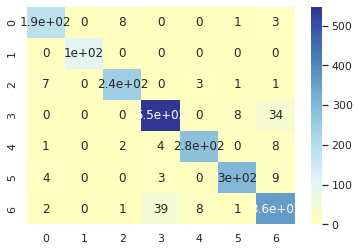

In [35]:
from sklearn.metrics import confusion_matrix
#Calculating Confusion Matrix
CM = confusion_matrix(y_valid, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True, cmap='RdYlBu', annot=True)
plt.show()

In [36]:
from sklearn.metrics import classification_report
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_valid,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

    BARBUNYA       0.93      0.94      0.93       198
      BOMBAY       1.00      1.00      1.00       100
        CALI       0.96      0.95      0.95       256
    DERMASON       0.92      0.93      0.93       589
       HOROZ       0.96      0.95      0.96       294
       SEKER       0.96      0.95      0.96       317
        SIRA       0.87      0.88      0.87       413

    accuracy                           0.93      2167
   macro avg       0.94      0.94      0.94      2167
weighted avg       0.93      0.93      0.93      2167



In [37]:
y_out=VotingClassifierModel.predict(test_X)
test_df['y']=y_out
test_df[['ID', 'y']].to_csv('submission2.csv', index = False)

In [38]:
# from sklearn.model_selection import GridSearchCV
# #Applying Grid Searching :  
# '''
# model_selection.GridSearchCV(estimator, param_grid, scoring=None,fit_params=None, n_jobs=None, iid=’warn’,
#                              refit=True, cv=’warn’, verbose=0,pre_dispatch=‘2*n_jobs’, error_score=
#                              ’raisedeprecating’,return_train_score=’warn’)

# '''

# #=======================================================================
# #Example : 
# #from sklearn.svm import SVR
# SelectedModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33)
# SelectedParameters = {'criterion':('gini', 'entropy'), 'max_depth':[2,3,4,5,6,7,8,9]}
# #=======================================================================
# GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 5,return_train_score=True)
# GridSearchModel.fit(X_train, y_train)
# sorted(GridSearchModel.cv_results_.keys())
# GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# # Showing Results
# #print('All Results are :\n', GridSearchResults )
# print('Best Score is :', GridSearchModel.best_score_)
# print('Best Parameters are :', GridSearchModel.best_params_)
# print('Best Estimator is :', GridSearchModel.best_estimator_)

In [39]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [40]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!